# Micro Credit Loan Use Case Model

Problem Statement: Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter. 

# Import Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

import pickle

# Import Dataset:

In [2]:
df = pd.read_csv('C:/csv_files/Data file.csv')
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


# Exploratory Data Analysis (EDA):

In [3]:
df.shape

(209593, 37)

Observation: Dataset has been containing 209593 rows and 37 features. Here, we can see that Unnamed:0 have id and mission has a mobile number so, both features may not affect any type of dataset. These are unnecessary features. We should remove it from our dataset.

In [4]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

# Finding Missing Values:

In [6]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

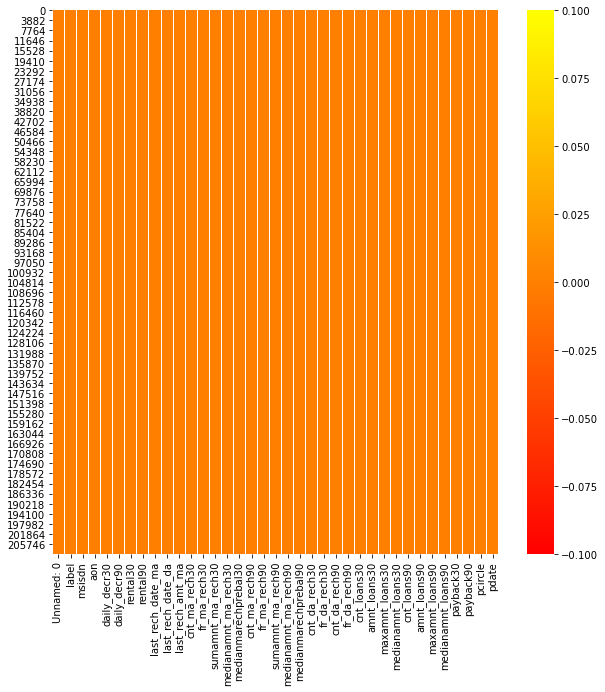

In [7]:
plt.figure(figsize = (10,10))
sns.heatmap(df.isnull(), cmap = 'autumn');

Observation: We see that there is no any null value found in our dataset. We also represent it through graph.

# Data Cleaning Process:

In [8]:
df.drop(['Unnamed: 0','msisdn'], axis = 1, inplace = True)
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


Observation: We removed the unnecessary feature from our dataset. 

In [9]:
df.nunique()

label                        2
aon                       4507
daily_decr30            147025
daily_decr90            158669
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianamnt_loans90           6
payback30                 1363
payback9

Here, we can see unique values of all features. Column 'pcircle' has only 1 as a unique value which is not add any weightage. So, we also remove this.

In [10]:
del df['pcircle']

# Converting Pdate into day/month/year:

In [11]:
df['pdate'] = df['pdate'].astype('datetime64')

In [12]:
df['pdate_day'] = df['pdate'].dt.day
df['pdate_month'] = df['pdate'].dt.month
df['pdate_year'] = df['pdate'].dt.year

Observation: Here, in above two code we convert object feature which is a date, into day, month and year.

In [13]:
df.nunique()

label                        2
aon                       4507
daily_decr30            147025
daily_decr90            158669
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianamnt_loans90           6
payback30                 1363
payback9

In [14]:
df.drop(columns = ['pdate', 'pdate_year'], inplace = True)

In [15]:
df.head().T

,0,1,2,3,4
label,0.00,1.00,1.00,1.000,1.000000
aon,272.00,712.00,535.00,241.000,947.000000
daily_decr30,3055.05,12122.00,1398.00,21.228,150.619333
daily_decr90,3065.15,12124.75,1398.00,21.228,150.619333
rental30,220.13,3691.26,900.13,159.420,1098.900000
rental90,260.13,3691.26,900.13,159.420,1098.900000
last_rech_date_ma,2.00,20.00,3.00,41.000,4.000000
last_rech_date_da,0.00,0.00,0.00,0.000,0.000000
last_rech_amt_ma,1539.00,5787.00,1539.00,947.000,2309.000000
cnt_ma_rech30,2.00,1.00,1.00,0.000,7.000000


# Statistical Summary & Data Visualization:

In [16]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_day,pdate_month
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,14.39894,6.797321
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,8.43890,0.741435
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,6.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,7.00000,6.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,14.00000,7.000000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,21.00000,7.000000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,31.00000,8.000000


Observation: When we see the describe of dataset we see many outliers but as per model requirement we can't delete them.

# Finding Outliers:

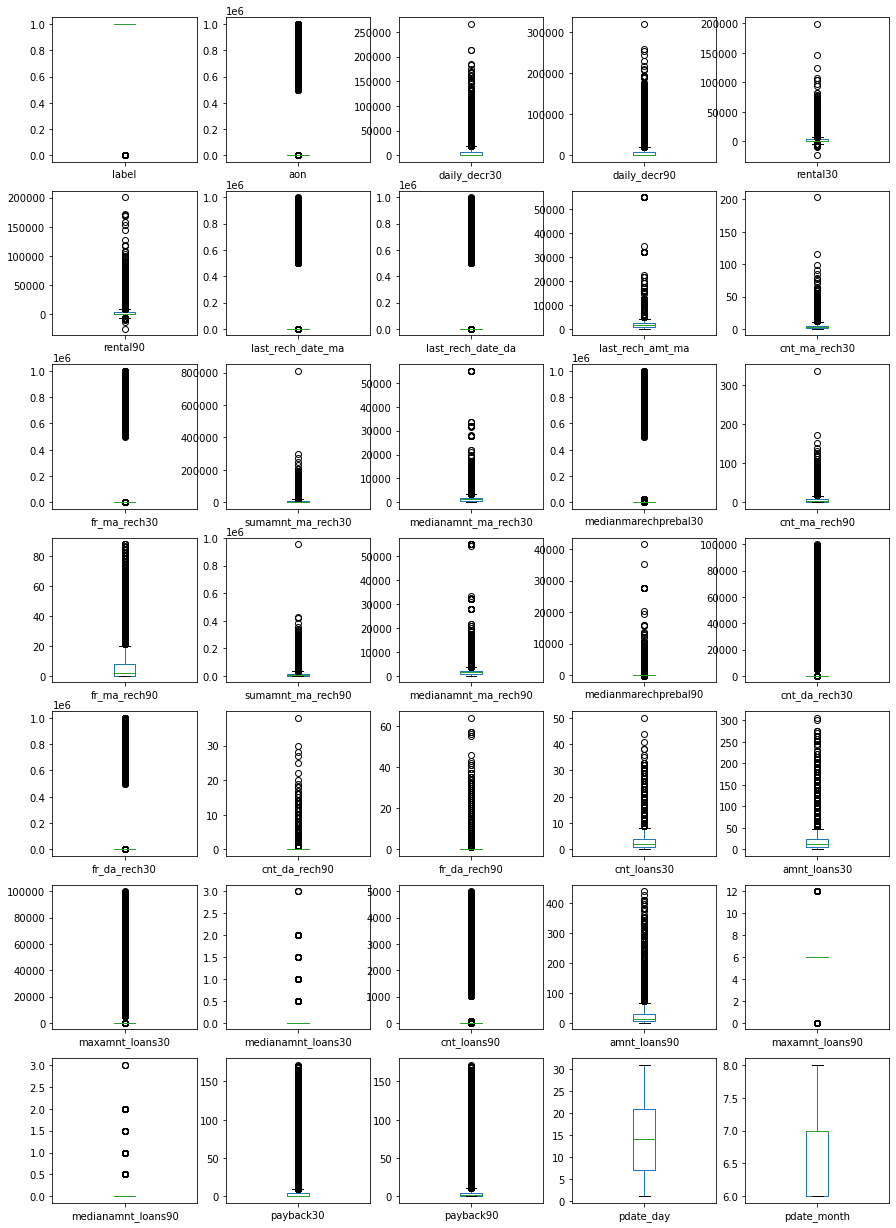

In [17]:
df.plot(kind = 'box', subplots = True, layout = (8,5), figsize = (15,25));

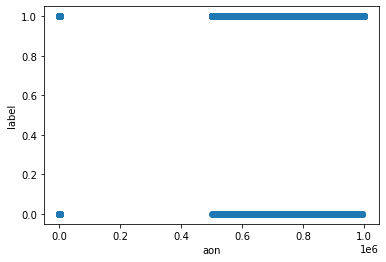

In [18]:
plt.scatter(df.aon, df.label)
plt.xlabel('aon')
plt.ylabel('label')
plt.show()

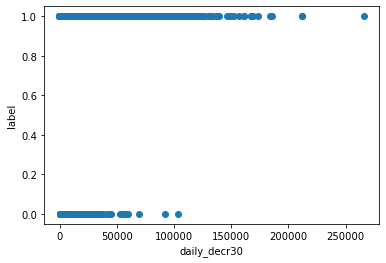

In [19]:
plt.scatter(df.daily_decr30, df.label)
plt.xlabel('daily_decr30')
plt.ylabel('label')
plt.show()

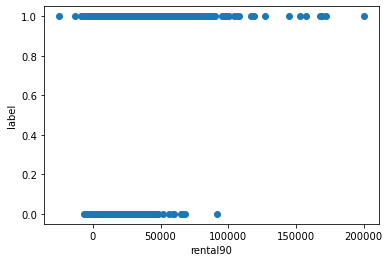

In [20]:
plt.scatter(df.rental90, df.label)
plt.xlabel('rental90')
plt.ylabel('label')
plt.show()

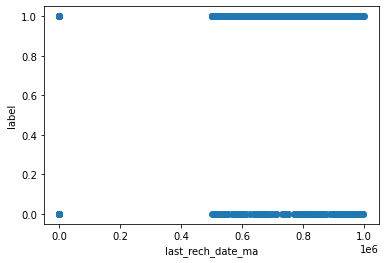

In [21]:
plt.scatter(df.last_rech_date_ma, df.label)
plt.xlabel('last_rech_date_ma')
plt.ylabel('label')
plt.show()

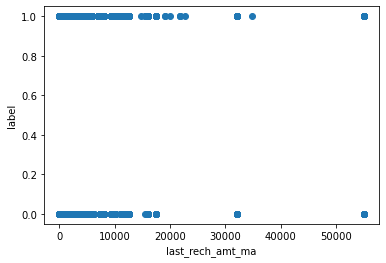

In [22]:
plt.scatter(df.last_rech_amt_ma, df.label)
plt.xlabel('last_rech_amt_ma')
plt.ylabel('label')
plt.show()

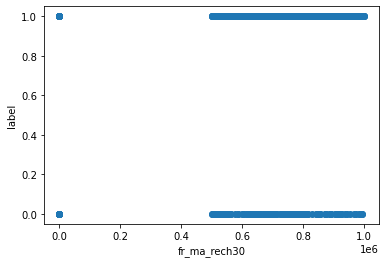

In [23]:
plt.scatter(df.fr_ma_rech30, df.label)
plt.xlabel('fr_ma_rech30')
plt.ylabel('label')
plt.show()

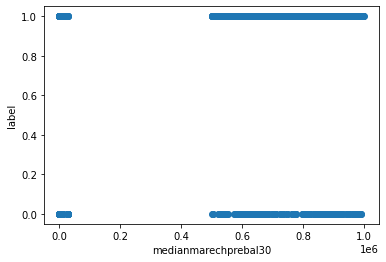

In [24]:
plt.scatter(df.medianmarechprebal30, df.label)
plt.xlabel('medianmarechprebal30')
plt.ylabel('label')
plt.show()

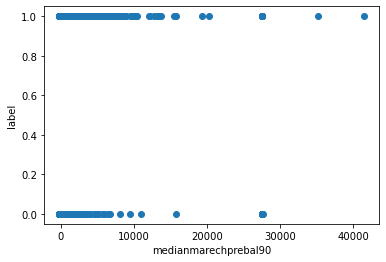

In [25]:
plt.scatter(df.medianmarechprebal90, df.label)
plt.xlabel('medianmarechprebal90')
plt.ylabel('label')
plt.show()

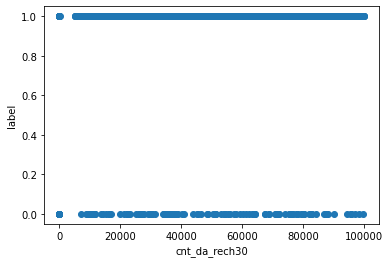

In [26]:
plt.scatter(df.cnt_da_rech30, df.label)
plt.xlabel('cnt_da_rech30')
plt.ylabel('label')
plt.show()

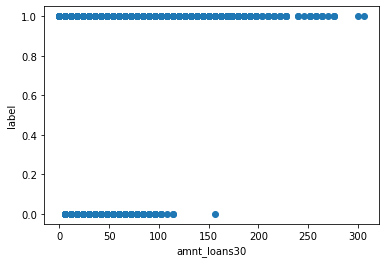

In [27]:
plt.scatter(df.amnt_loans30, df.label)
plt.xlabel('amnt_loans30')
plt.ylabel('label')
plt.show()

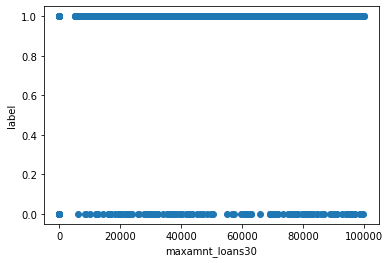

In [28]:
plt.scatter(df.maxamnt_loans30, df.label)
plt.xlabel('maxamnt_loans30')
plt.ylabel('label')
plt.show()

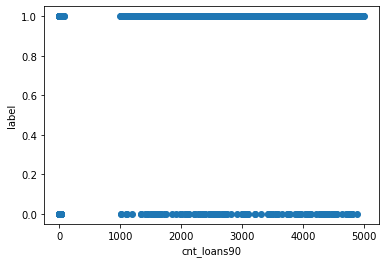

In [29]:
plt.scatter(df.cnt_loans90, df.label)
plt.xlabel('cnt_loans90')
plt.ylabel('label')
plt.show()

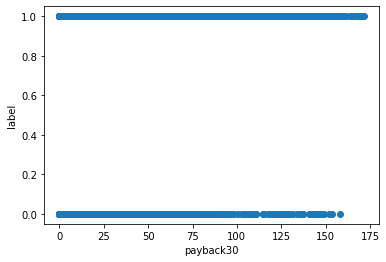

In [30]:
plt.scatter(df.payback30, df.label)
plt.xlabel('payback30')
plt.ylabel('label')
plt.show()

Observation:on the above visualization we see that outliers present in our dataset.

# Find Correlation:

In [31]:
df.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_day,pdate_month
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,0.001330,0.202828,0.141490,-0.004829,0.236392,0.084385,0.205793,0.120855,0.039300,0.003827,-0.000027,0.002999,-0.005418,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183,0.006825,0.154949
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,-0.001163,0.000707,0.004306,0.003930,-0.002725,0.004401,0.001011,0.004909,-0.000859,0.001564,0.000892,0.001121,0.005395,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203,0.000662,-0.001863
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,-0.000577,0.636536,0.295356,-0.001153,0.587338,-0.078299,0.762981,0.257847,0.037495,0.000700,-0.001499,0.038814,0.020673,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175,0.006477,0.518664
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,-0.000343,0.603886,0.282960,-0.000746,0.593069,-0.079530,0.768817,0.250518,0.036382,0.000661,-0.001570,0.031155,0.016437,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800,-0.021508,0.539410
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,-0.001219,0.272649,0.129853,-0.001415,0.312118,-0.033530,0.342306,0.110356,0.027170,-0.001105,-0.002558,0.072255,0.046761,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147,0.036537,0.365699
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,-0.000503,0.259709,0.120242,-0.001237,0.345293,-0.036524,0.360601,0.103151,0.029547,-0.000548,-0.002345,0.056282,0.036886,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501,0.008941,0.429407
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,-0.001629,0.002105,-0.001358,0.004071,0.004263,0.001414,0.002243,-0.000726,-0.001086,-0.003467,-0.003626,-0.003538,-0.002395,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583,0.000560,-0.001207
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,0.001158,0.000046,0.001037,0.002849,0.001272,0.000798,-0.000414,0.000219,0.004158,-0.003628,-0.000074,-0.001859,-0.000203,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417,0.000631,-0.001800
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,0.002876,0.440821,0.794646,-0.002342,0.016707,0.106267,0.418735,0.818734,0.124646,-0.001837,-0.003230,0.014779,0.016042,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260,0.028883,0.096919
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,0.001669,0.656986,-0.011792,0.000082,0.886433,-0.152759,0.584060,-0.051347,0.013463,0.002306,-0.002732,0.011981,0.006989,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362,0.068643,0.156148


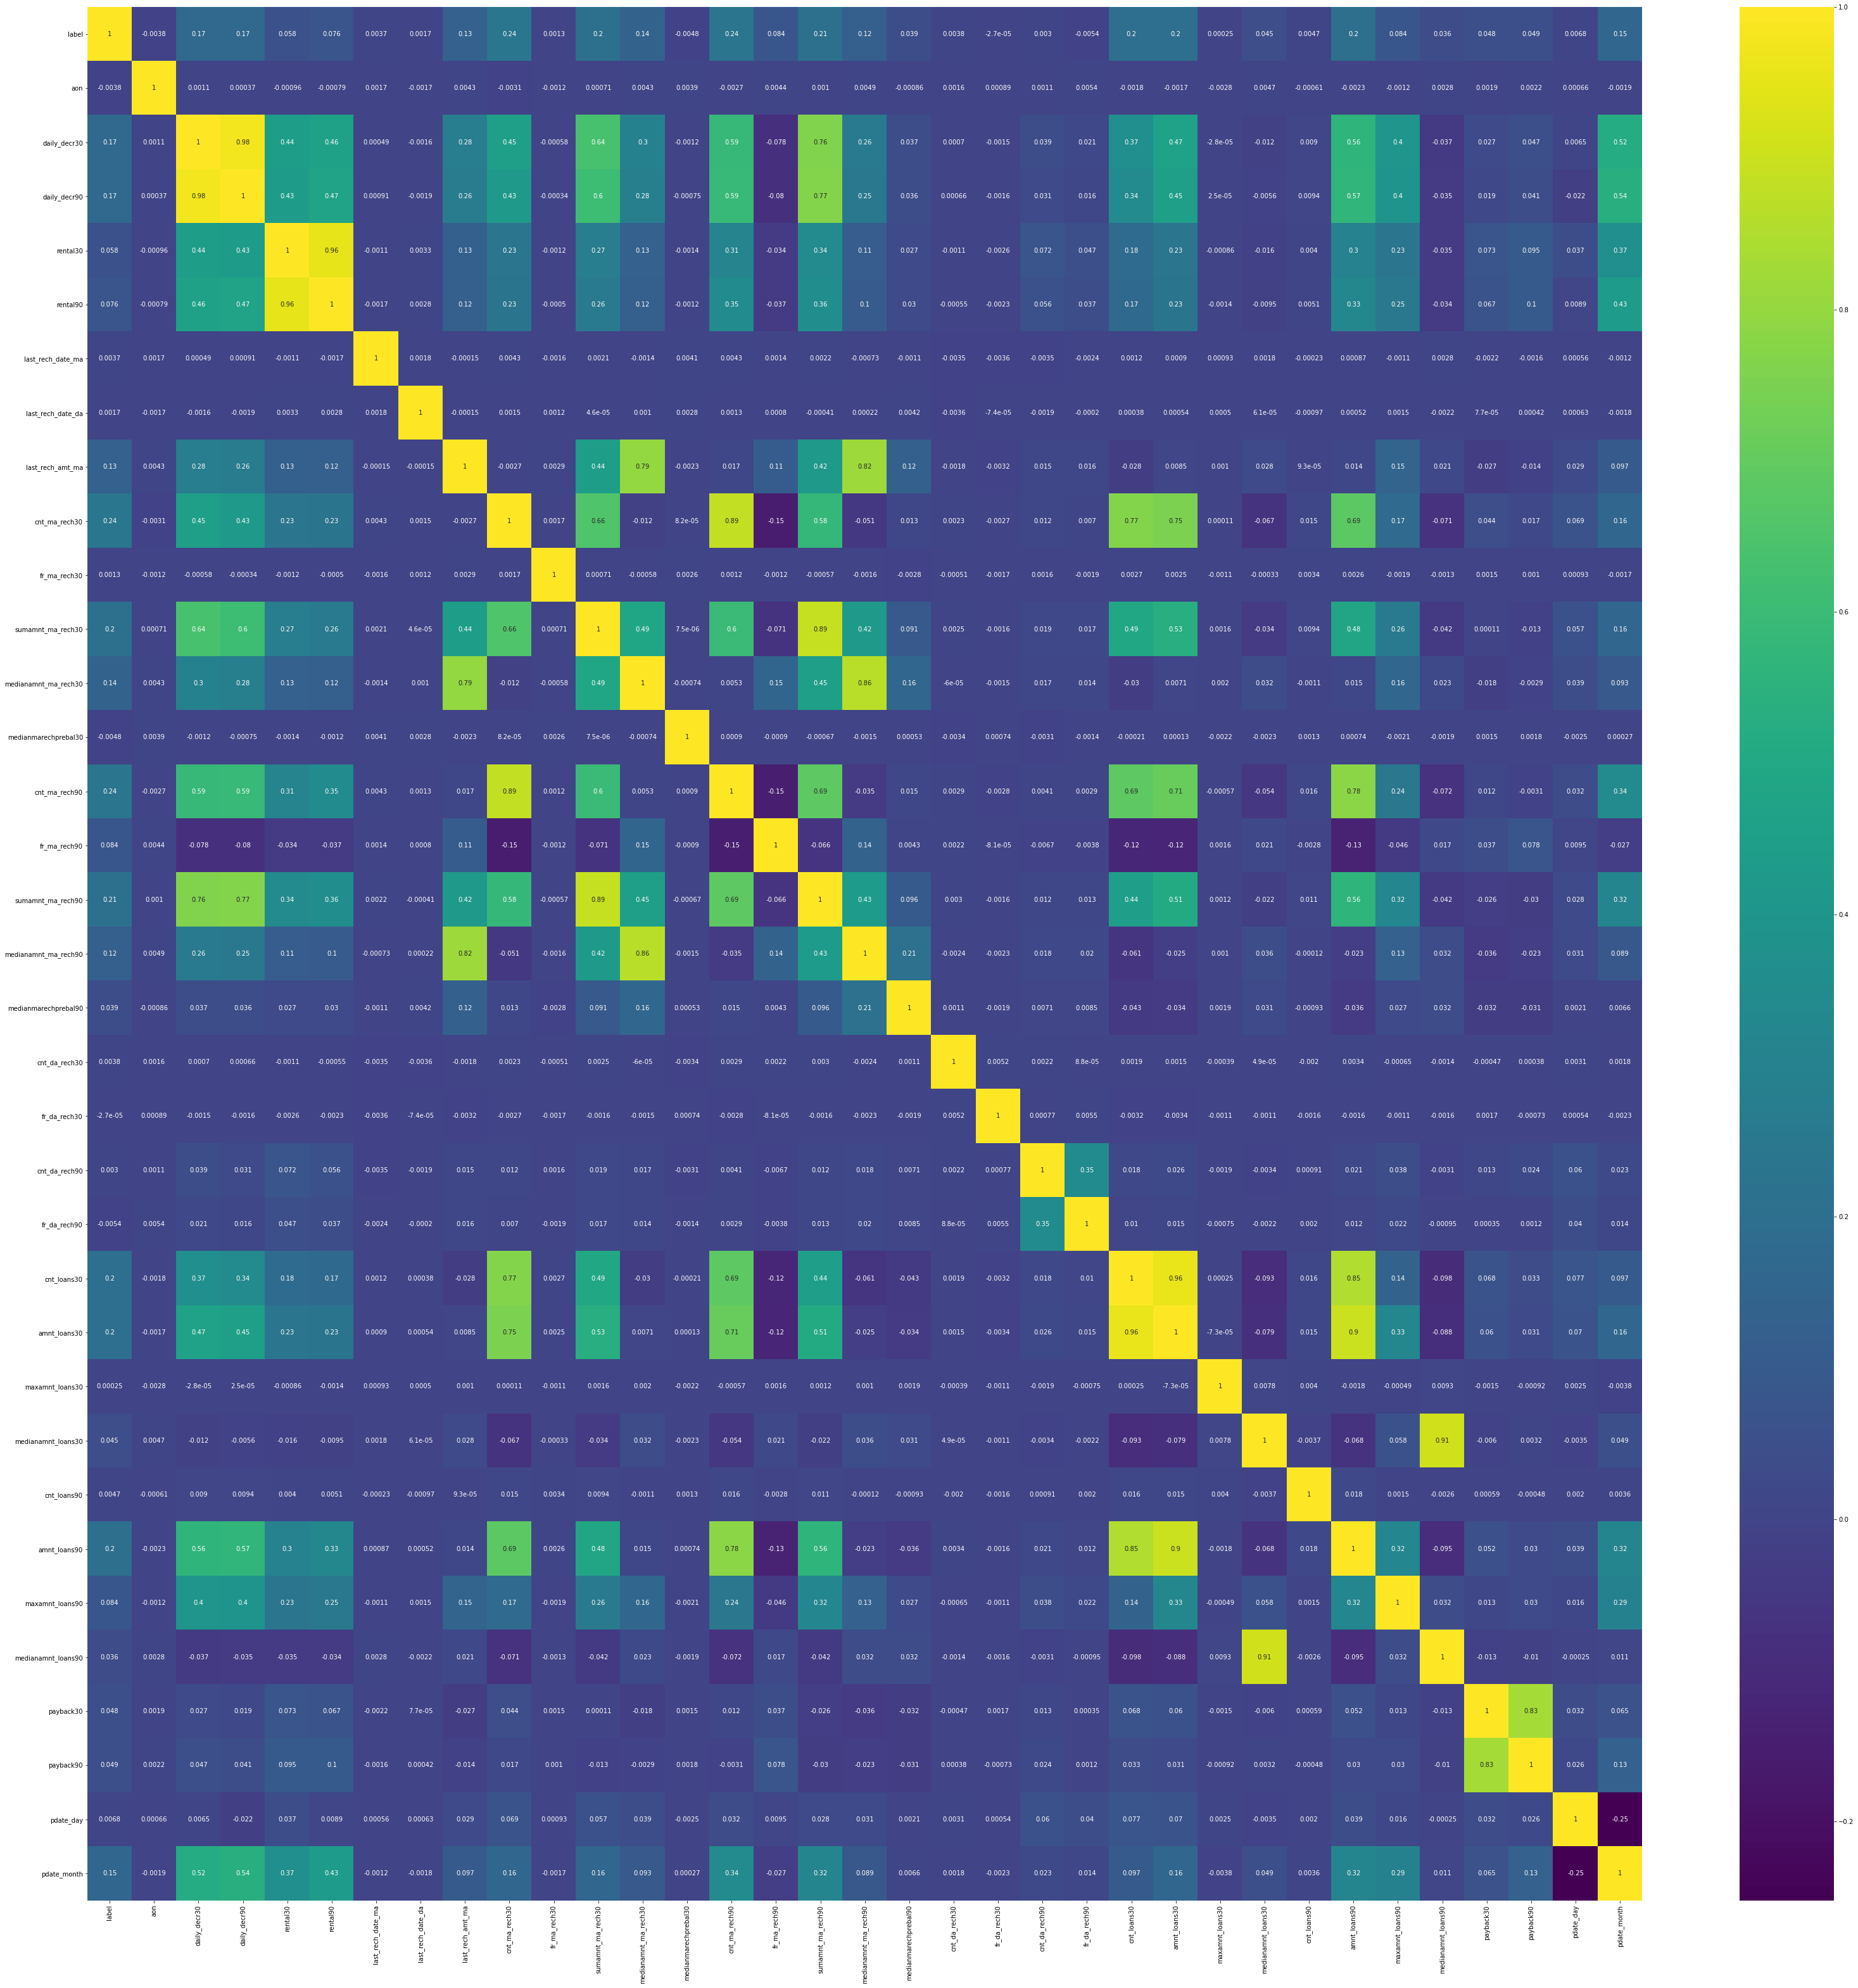

In [32]:
plt.figure(figsize=(55,55))
sns.heatmap(df.corr(), annot = True, cmap = 'viridis');

# Finding Skewness:

In [33]:
df.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

In [34]:
from scipy.stats import skew

label
-2.2702374722925835


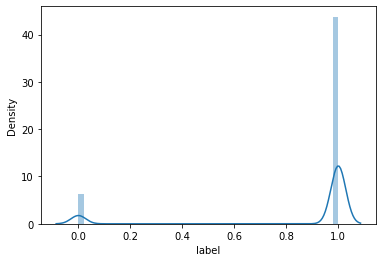

aon
10.392874441936286


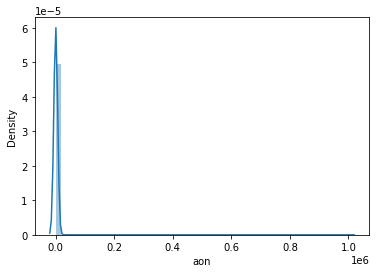

daily_decr30
3.9462019874779264


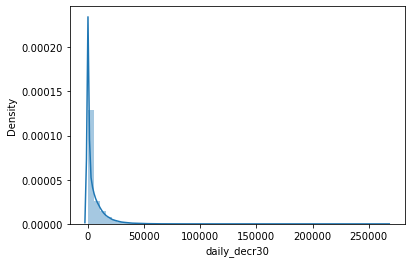

daily_decr90
4.252534591106086


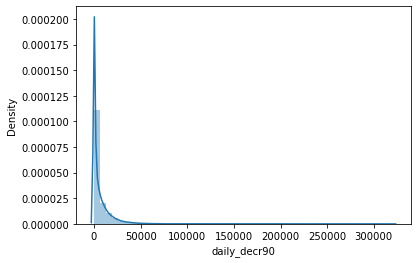

rental30
4.5218966473064315


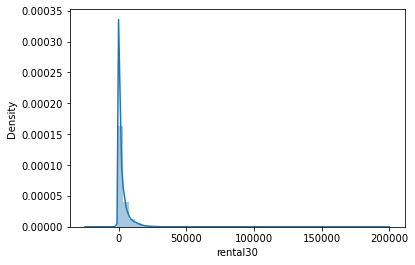

rental90
4.4376487807407266


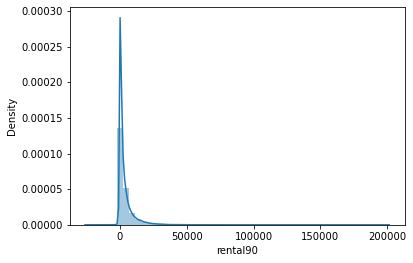

last_rech_date_ma
14.790868005814286


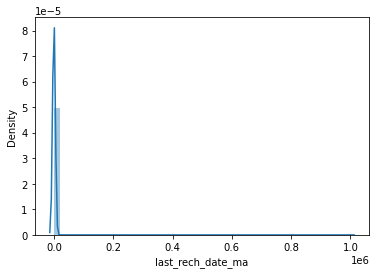

last_rech_date_da
14.814751205382457


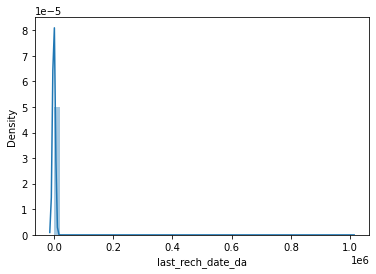

last_rech_amt_ma
3.781121576407043


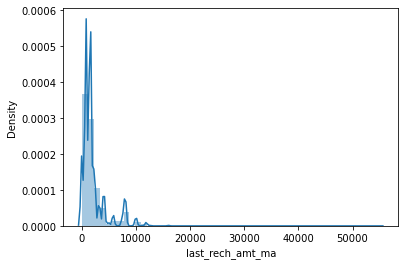

cnt_ma_rech30
3.2838180013879295


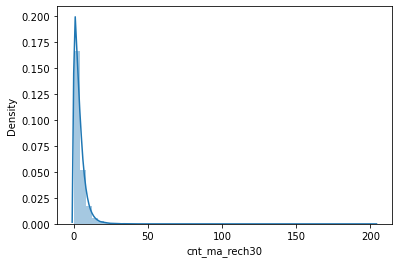

fr_ma_rech30
14.772726911394182


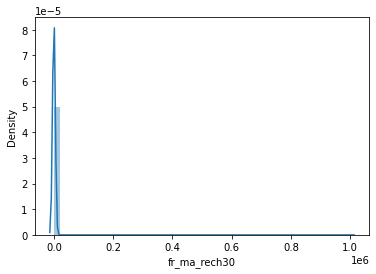

sumamnt_ma_rech30
6.386741340983388


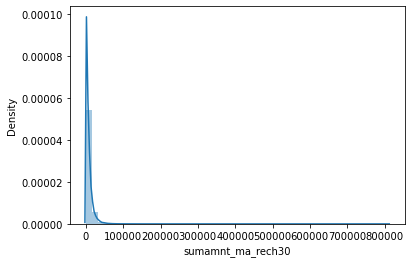

medianamnt_ma_rech30
3.512299013694375


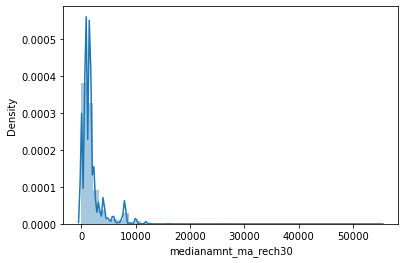

medianmarechprebal30
14.779769568118233


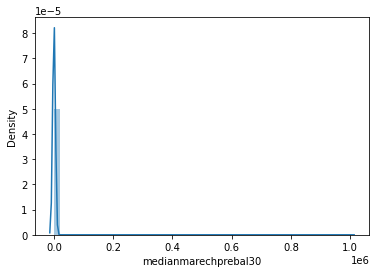

cnt_ma_rech90
3.425229132902297


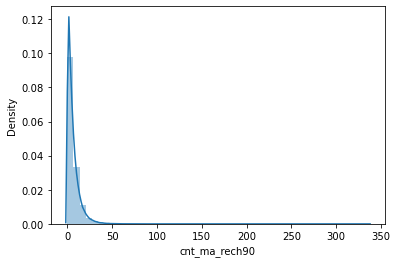

fr_ma_rech90
2.2854064403417964


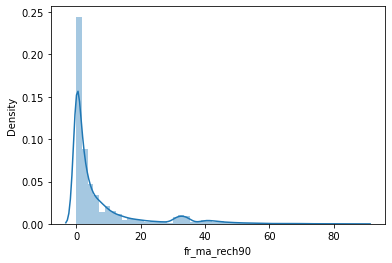

sumamnt_ma_rech90
4.897914558768428


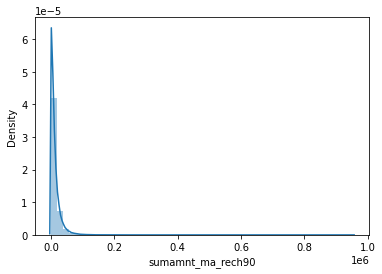

medianamnt_ma_rech90
3.752679166445998


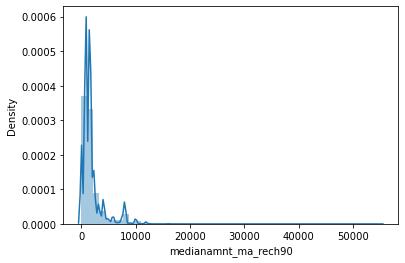

medianmarechprebal90
44.88018204130558


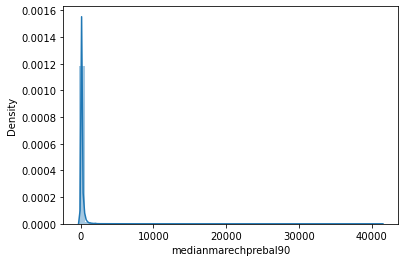

cnt_da_rech30
17.818236613825185


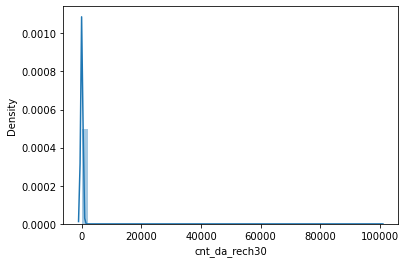

fr_da_rech30
14.776324483257788


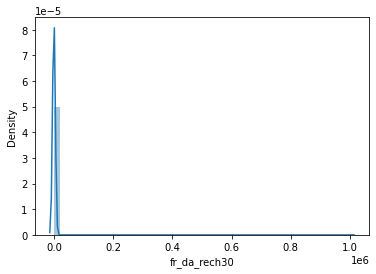

cnt_da_rech90
27.26708253699577


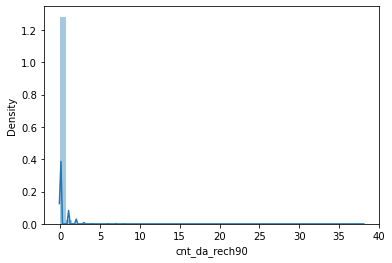

fr_da_rech90
28.987875246755486


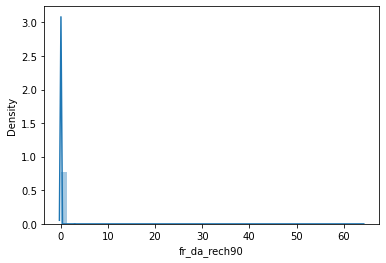

cnt_loans30
2.7134016676460946


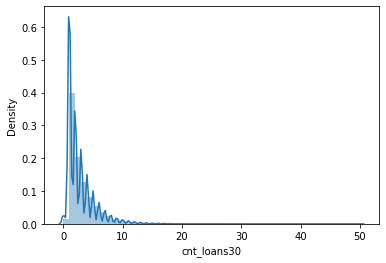

amnt_loans30
2.9756981766272026


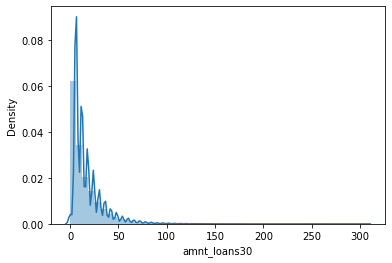

maxamnt_loans30
17.657925277921116


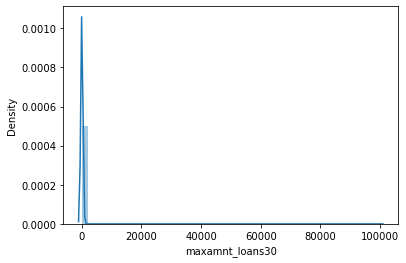

medianamnt_loans30
4.55101044632022


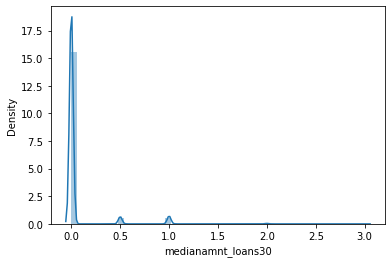

cnt_loans90
16.594289211972985


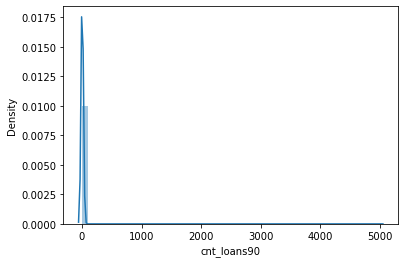

amnt_loans90
3.149983788160599


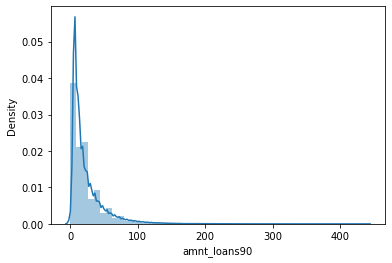

maxamnt_loans90
1.6782917785500069


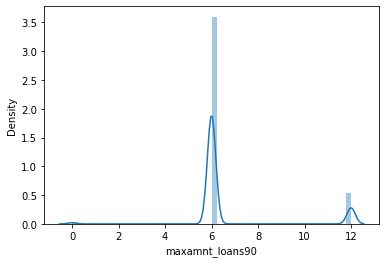

medianamnt_loans90
4.8956852390988965


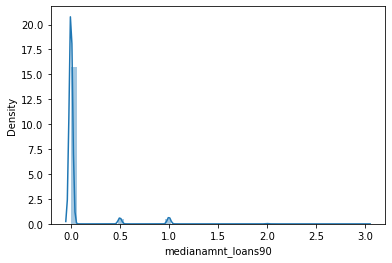

payback30
8.31063517895075


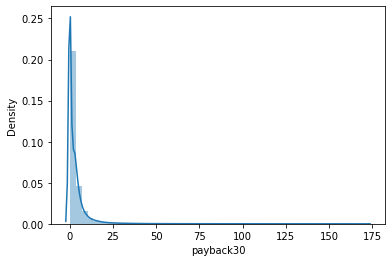

payback90
6.899901431460752


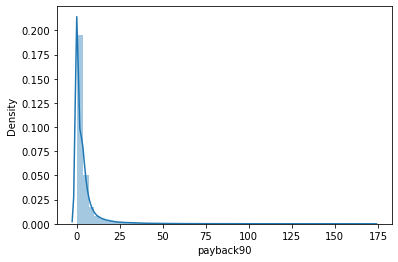

pdate_day
0.19984389506062195


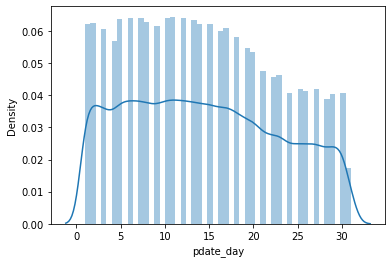

pdate_month
0.3432394376251


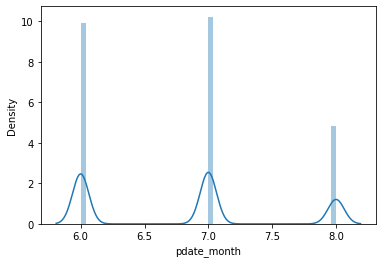

In [35]:
for i in df:
    print(i)
    print(skew(df[i]))
    
    plt.figure()
    sns.distplot(df[i])
    plt.show()

In [36]:
df.drop(columns=['aon','daily_decr30','daily_decr90','rental30','last_rech_date_ma',
                 'last_rech_date_da','last_rech_date_da','cnt_ma_rech30','fr_ma_rech30',
                 'sumamnt_ma_rech30','medianamnt_ma_rech30','medianmarechprebal30',
                 'cnt_ma_rech90','sumamnt_ma_rech90','cnt_da_rech30',
                 'fr_da_rech30','fr_da_rech90','cnt_loans90'], axis = 1, inplace = True)

Observation: We removed all those features which has minimum correlation with label.

In [37]:
df.shape

(209593, 18)

# Feature Selection:

In [38]:
from sklearn.feature_selection import SelectKBest, f_classif

In [39]:
x = df.drop(columns = ['label'])
y = df.label

In [40]:
best_feature=SelectKBest(score_func=f_classif)
fit=best_feature.fit(x,y)

scores=pd.DataFrame(fit.scores_)
scores['feature_name']=x.columns
scores.columns=['score','column_name']
scores.sort_values(by=['score'],ascending=False).reset_index()

,index,score,column_name
0,10,8713.713240,amnt_loans90
1,7,8486.771736,amnt_loans30
2,6,8398.510078,cnt_loans30
3,16,5155.893648,pdate_month
4,1,3705.420270,last_rech_amt_ma
5,3,3106.653091,medianamnt_ma_rech90
6,2,1503.150310,fr_ma_rech90
7,11,1494.523796,maxamnt_loans90
8,0,1202.229543,rental90
9,14,508.224020,payback90


In [41]:
New_X = df[scores.nlargest(11, 'score').column_name]

In [42]:
new_df = pd.concat([New_X, y], axis = 1)

In [43]:
new_df.reset_index(inplace = True)

# Remove Outliers:

In [44]:
from scipy.stats import zscore

In [45]:
del new_df['index']

In [46]:
z = zscore(new_df)

In [47]:
z_df = new_df[(z<= 3.7).all(axis = 1)]

In [48]:
print(new_df.shape)
print(z_df.shape)

(209593, 12)
(195186, 12)


# Data Imbalance Testing:

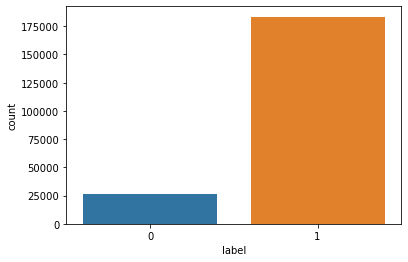

In [49]:
sns.countplot(df['label']);

Observation: We can see that data is imbalance, so we need to balance it.

In [50]:
from sklearn.utils import resample

In [51]:
label_1 = df[df['label']==1]
label_0 = df[df['label']==0]

In [52]:
upsample = resample(label_0, n_samples = 150000, random_state = 91)

In [53]:
label_1.shape

(183431, 18)

In [54]:
upsample.shape

(150000, 18)

In [55]:
up_df = pd.concat([label_1, upsample], axis = 0)

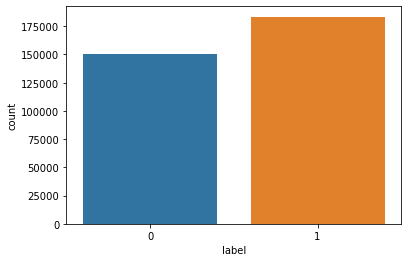

In [56]:
sns.countplot(up_df['label']);

In [57]:
up_df.head()

,label,rental90,last_rech_amt_ma,fr_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_day,pdate_month
1,1,3691.26,5787,0,5787.0,61.04,0,1,12,12.0,0.0,12,12,0.0,0.000000,0.000000,10,8
2,1,900.13,1539,0,1539.0,66.32,0,1,6,6.0,0.0,6,6,0.0,0.000000,0.000000,19,8
3,1,159.42,947,0,947.0,2.50,0,2,12,6.0,0.0,12,6,0.0,0.000000,0.000000,6,6
4,1,1098.90,2309,2,2888.0,35.00,0,7,42,6.0,0.0,42,6,0.0,2.333333,2.333333,22,6
5,1,380.13,1539,0,1539.0,55.90,0,3,18,6.0,0.0,18,6,0.0,11.000000,8.333333,2,7


# Split Dataset:

In [58]:
x = up_df.drop(columns =['label'])
y = up_df.label

# Scaling:

In [59]:
scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=91)

# Model Building:

In [61]:
lr=LogisticRegression()
rfc=RandomForestClassifier()
ada=AdaBoostClassifier()
xgb=XGBClassifier()

In [62]:
lr.fit(x_train,y_train)
rfc.fit(x_train,y_train)
ada.fit(x_train,y_train)
xgb.fit(x_train,y_train)

[07:19:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# Training Score:

In [63]:
print(lr.score(x_train,y_train))
print(rfc.score(x_train,y_train))
print(ada.score(x_train,y_train))
print(xgb.score(x_train,y_train))

0.7289871357563591
0.9961811151143866
0.7919327556353545
0.847516525174649


# Evalution (Test Data):

In [64]:
#Logistic regression score

y_pred=lr.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

72.8280428993018


In [65]:
#Random Forest score

y_pred=rfc.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

96.21631996928909


In [66]:
#Ada Boost score

y_pred=ada.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

79.2185513088126


In [67]:
#XGB score

y_pred=xgb.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

83.91995969193118


# Cross Validation:

In [68]:
from sklearn.model_selection import cross_val_score

In [69]:
print('Logistic Regression score:',np.mean(cross_val_score(lr,x_scaled,y))*100)

print('Random Forest score:',np.mean(cross_val_score(rfc,x_scaled,y))*100)

print('AdaBoost score:',np.mean(cross_val_score(ada,x_scaled,y))*100)

print('XGB score:',np.mean(cross_val_score(xgb,x_scaled,y))*100)

Logistic Regression score: 72.87324873186569
Random Forest score: 96.46013711851535
AdaBoost score: 79.19299702964679
[08:00:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:01:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:02:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_me

Observation: Here, we can see that Random Forest Classifier model is the best of all. It predicts almost 97% accuracy and so does the cross validation score. So, we say that our model is working good.

In [70]:
y_pred=rfc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     37611
           1       0.99      0.94      0.96     45747

    accuracy                           0.96     83358
   macro avg       0.96      0.96      0.96     83358
weighted avg       0.96      0.96      0.96     83358



In [71]:
print(confusion_matrix(y_test,y_pred))

[[37340   271]
 [ 2883 42864]]


# HyperParameter Tunning:

In [72]:
rfc=RandomForestClassifier(criterion= 'gini',
 max_depth= 22,
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 90)

rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

93.39235586266466


In [74]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

In [75]:
print(accuracy_score(y_test,y_pred)*100)
print(np.round(rfc.score(x_train,y_train)))

96.19592600590225
1.0


Here, we get same score after hyperparameter tunning.

# AUC ROC

In [76]:
from sklearn.metrics import plot_roc_curve

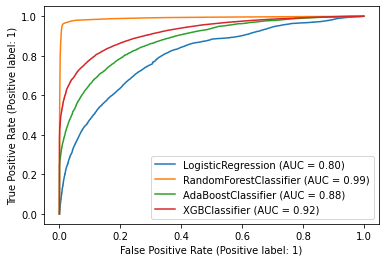

In [77]:
dis_plot = plot_roc_curve(lr, x_test, y_test)
plot_roc_curve(rfc, x_test, y_test, ax = dis_plot.ax_)
plot_roc_curve(ada, x_test, y_test, ax = dis_plot.ax_)
plot_roc_curve(xgb, x_test, y_test, ax = dis_plot.ax_);

Here, we can see that Random forest has given almost 100% score through ROC curve. We found best model as RFC.

# Final Scoring:

In [78]:
print('-'*20,'Confusion matrix','-'*20,'\n\n',confusion_matrix(y_test,y_pred))
print('-'*20,'Accuracy score','-'*20,'\n\n',accuracy_score(y_test,y_pred))
print('-'*20,'Training score','-'*20,'\n\n',rfc.score(x_train,y_train))
print('-'*20,'Classification Report','-'*20,'\n\n',classification_report(y_test,y_pred))

-------------------- Confusion matrix -------------------- 

 [[37335   276]
 [ 2895 42852]]
-------------------- Accuracy score -------------------- 

 0.9619592600590225
-------------------- Training score -------------------- 

 0.9961851139467276
-------------------- Classification Report -------------------- 

               precision    recall  f1-score   support

           0       0.93      0.99      0.96     37611
           1       0.99      0.94      0.96     45747

    accuracy                           0.96     83358
   macro avg       0.96      0.96      0.96     83358
weighted avg       0.96      0.96      0.96     83358



# Model Save:

In [79]:
file_name = 'micro_credit_loan_defaulter.pickle'
pickle.dump(rfc, open(file_name,'wb'))